In [1]:
import pandas as pd
import os, glob
from datetime import datetime, date, timedelta
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import cm, ticker

import warnings
warnings.filterwarnings('ignore')

In [4]:
path = '../Results/Detection_snap/'
dsun = pd.read_csv('../DataBase/Data_CWA/sunset_time_taoyuan2023.csv')

In [72]:
def plotnight(time, ax, ymin, ymax):
    month = time.month
    day = time.day
    nextdate = time+timedelta(days=1)
    nextmonth = nextdate.month
    nextday = nextdate.day

    sunset = int((dsun['SUNSET'][dsun['TIME'] == f'2023/{month}/{day}'].values[0]).rsplit(':')[-1])
    sunrise = int((dsun['SUNRSET'][dsun['TIME'] == f'2023/{nextmonth}/{nextday}'].values[0]).rsplit(':')[-1])
    for i in range(len(ax)):
        ax[i].fill_betweenx(y=[ymin-5, ymax], x1=datetime(2023, month, day, 18, sunset), x2=datetime(2023, nextmonth, nextday, 5, sunrise), color='orange', alpha=0.1)
    return ax

def plotlight(time, ax, excess=10000):
    month = str(time.month).zfill(2)
    day = str(time.day).zfill(2)
    
    filepath = '../DataBase/Temperature/Taoyuan/230414-230504.xlsx'
    dlight = pd.read_excel(filepath, header=None, names=['Time', 'Temp', 'Light'], skiprows=110,) 
    dlight = dlight[dlight['Light']<excess]
    dlight_ = dlight[dlight['Time'] <= np.datetime64(f'2023-{month}-{day} 23:59:59')][dlight['Time'] >= np.datetime64(f'2023-{month}-{day} 00:00:00')]
    begintime = pd.to_datetime(str(dlight_['Time'].values[0]))
    endtime   = pd.to_datetime(str(dlight_['Time'].values[-1]))
    ax.plot(pd.to_datetime(dlight_['Time']), dlight_['Light'], 'dimgrey', lw=0.75)
    ax.set_ylabel('Illumination (lux)', color='dimgrey', fontsize=fsize)
    ax.set_ylim(0, excess)
    ax.tick_params(axis='y', colors='dimgrey')
    
    return ax

def plotrain(ax, ymin=0, ymax=50):
    rainpath = '/Volumes/Data/Rainfall_CWA/467050_新屋/467050_2023.csv'
    drain = pd.read_csv(rainpath)
    ax.plot(pd.to_datetime(drain['time(UTC+8)']), drain['rain_in_hr'], c='dodgerblue', lw=1)
    ax.set_ylabel('Precipitation (mm)', color='dodgerblue', fontsize=fsize)
    ax.tick_params(axis='y', colors='dodgerblue')
    ax.set_ylim(ymin, ymax)
    
    return ax

../Results/Detection_snap/detect_230414.csv
../Results/Detection_snap/detect_230415.csv
../Results/Detection_snap/detect_230416.csv
../Results/Detection_snap/detect_230417.csv
../Results/Detection_snap/detect_230418.csv
../Results/Detection_snap/detect_230419.csv
../Results/Detection_snap/detect_230420.csv
../Results/Detection_snap/detect_230421.csv
../Results/Detection_snap/detect_230422.csv


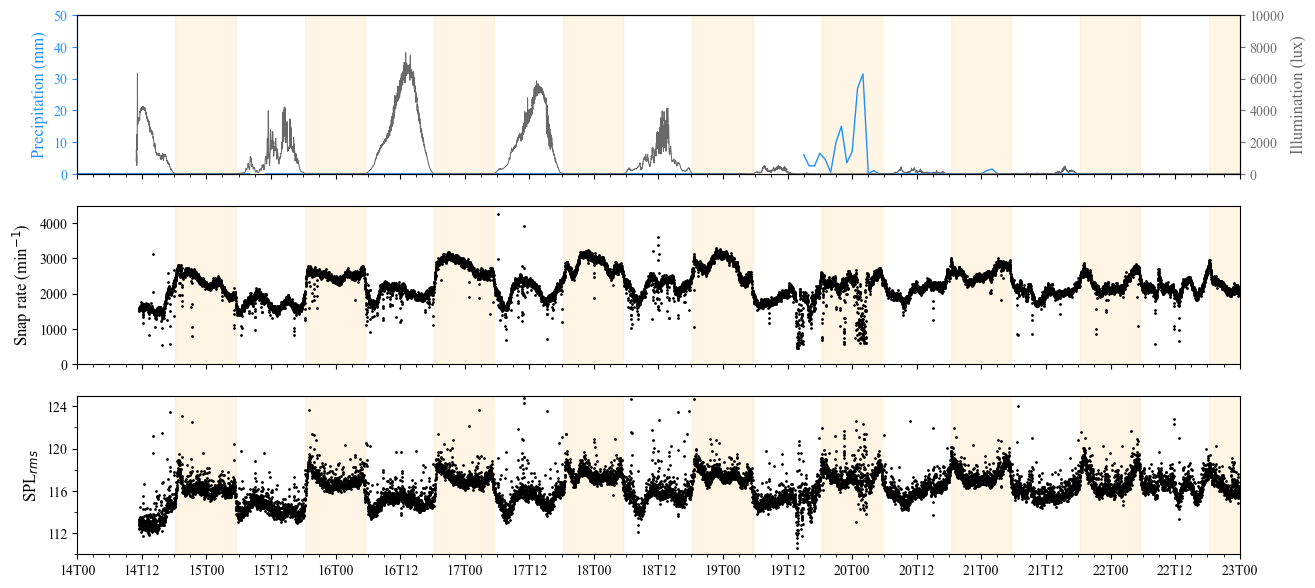

In [75]:
fig, ax = plt.subplots(3, figsize=(15, 7), sharex=True)
plt.rcParams["font.family"] = "Times New Roman"
ymin= 0; ymax = 4500
fsize = 12

#=======================================================
ax_light = ax[0].twinx()
ax[0] = plotrain(ax[0])
ax[0].spines['right'].set_color('dimgrey')
ax[0].spines['left'].set_color('dodgerblue')

for filepath in sorted(glob.glob(f'{path}/*csv')):
    
    df = pd.read_csv(filepath)
    gettime = pd.to_datetime(df['Time'].values[0])
    ax = plotnight(gettime, ax, ymin, ymax)
    ax_light = plotlight(gettime, ax_light)
    
    ax[1].scatter(pd.to_datetime(df['Time']), df['Peak'], c='k', marker='o', s=1 )
    ax[2].scatter(pd.to_datetime(df['Time']), df['SPLrms'], c='k', marker='o', s=1 )
    print(filepath)



ax[1].set_xlim(datetime(2023,4,14), datetime(2023,4,23))
ax[1].set_ylim(ymin, ymax)
ax[1].set_ylabel('Snap rate (min$^{-1}$)', fontsize=fsize)
ax[1].xaxis.set_major_locator(mdates.HourLocator(interval=12))   #to get a tick every 15 minutes
ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%dT%H'))     #optional formatting 
ax[1].xaxis.set_minor_locator(mdates.HourLocator(interval=3))   #to get a tick every 15 minutes


ax[2].set_ylim(110, 125)
ax[2].set_ylabel('SPL$_{rms}$', fontsize=fsize)
ax[2].yaxis.set_major_locator(ticker.MultipleLocator(4))  
ax[2].yaxis.set_minor_locator(ticker.MultipleLocator(2)) 

In [76]:
    filepath = '../DataBase/Temperature/Taoyuan/230414-230504.xlsx'
    dlight = pd.read_excel(filepath, header=None, names=['Time', 'Temp', 'Light'], skiprows=110,) 

In [84]:
np.mean(dlight['Temp'])

24.50913019214366

In [80]:
np.std(dlight['Temp'])

0.593610146477881

In [81]:
np.max(dlight['Temp'])

32.9447265625

In [82]:
np.min(dlight['Temp'])

22.948935546875